`--- Day 12: Subterranean Sustainability ---`

For example, given the following input:
```
initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #
```
For brevity, in this example, only the combinations which do produce a plant are listed. (Your input includes all possible combinations.) Then, the next 20 generations will look like this:
```
                 1         2         3     
       0         0         0         0     
 0: ...#..#.#..##......###...###...........
 1: ...#...#....#.....#..#..#..#...........
 2: ...##..##...##....#..#..#..##..........
 3: ..#.#...#..#.#....#..#..#...#..........
 4: ...#.#..#...#.#...#..#..##..##.........
 5: ....#...##...#.#..#..#...#...#.........
 6: ....##.#.#....#...#..##..##..##........
 7: ...#..###.#...##..#...#...#...#........
 8: ...#....##.#.#.#..##..##..##..##.......
 9: ...##..#..#####....#...#...#...#.......
10: ..#.#..#...#.##....##..##..##..##......
11: ...#...##...#.#...#.#...#...#...#......
12: ...##.#.#....#.#...#.#..##..##..##.....
13: ..#..###.#....#.#...#....#...#...#.....
14: ..#....##.#....#.#..##...##..##..##....
15: ..##..#..#.#....#....#..#.#...#...#....
16: .#.#..#...#.#...##...#...#.#..##..##...
17: ..#...##...#.#.#.#...##...#....#...#...
18: ..##.#.#....#####.#.#.#...##...##..##..
19: .#..###.#..#.#.#######.#.#.#..#.#...#..
20: .#....##....#####...#######....#.#..##.
```

In [1]:
from collections import defaultdict
from itertools import starmap
import unittest
import re

In [2]:
test_input = '''initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #
'''.splitlines()

real_input = open('input.txt').read().splitlines()

test_generations = ''' 0: ...#..#.#..##......###...###...........
 1: ...#...#....#.....#..#..#..#...........
 2: ...##..##...##....#..#..#..##..........
 3: ..#.#...#..#.#....#..#..#...#..........
 4: ...#.#..#...#.#...#..#..##..##.........
 5: ....#...##...#.#..#..#...#...#.........
 6: ....##.#.#....#...#..##..##..##........
 7: ...#..###.#...##..#...#...#...#........
 8: ...#....##.#.#.#..##..##..##..##.......
 9: ...##..#..#####....#...#...#...#.......
10: ..#.#..#...#.##....##..##..##..##......
11: ...#...##...#.#...#.#...#...#...#......
12: ...##.#.#....#.#...#.#..##..##..##.....
13: ..#..###.#....#.#...#....#...#...#.....
14: ..#....##.#....#.#..##...##..##..##....
15: ..##..#..#.#....#....#..#.#...#...#....
16: .#.#..#...#.#...##...#...#.#..##..##...
17: ..#...##...#.#.#.#...##...#....#...#...
18: ..##.#.#....#####.#.#.#...##...##..##..
19: .#..###.#..#.#.#######.#.#.#..#.#...#..
20: .#....##....#####...#######....#.#..##.
'''.splitlines()

test_generations = list(map(lambda x: x[4:], test_generations))

test_sum = 325

In [3]:
class TestDay12p1(unittest.TestCase):
    
    def setUp(self):
        self.plants = Plants(test_input)
    
    def test_evolution(self):
        for i, gen in enumerate(test_generations):
            with self.subTest(i=i):
                self.assertEqual(gen.replace(str(self.plants), '').replace('.', ''), '')
                self.plants.evolve()
                
    def test_sum(self):
        for i in range(20):
            self.plants.evolve()
        self.assertEqual(self.plants.sumPotNumbers(), test_sum)

In [4]:
class Plants(object):
    
    def __init__(self, input_lines):
        self.offset = 0 # to keep track of where pot #0 is
        self.state, self.rules = self.parse(input_lines)
        
    def parse(self, lines):
        initial = '.....' + lines[0].split(':')[-1].strip() + '.....'
        self.offset = 3
        # defaultdict because the example doesn't list the rules that map to '.'
        rules = defaultdict(lambda: '.', map(lambda x: (x[0], x[2]), map(lambda x: x.partition(' => '), lines[2:])))
        state = self.str_to_state(initial)
        return state, rules
    
    def str_to_state(self, s):
        return list(group(s))
    
    def evolve(self):
        mapped = ''.join([self.rules[x] for x in self.state])
        self.offset -= 2
        left = ''
        right = ''
        left_dots = mapped.find('#')
        if left_dots < 5:
            left = '.' * (5 - left_dots)
        right_dots = mapped[::-1].find('#')
        if right_dots < 5:
            right = '.' * (5 - right_dots)
        self.offset += len(left)
        self.state = self.str_to_state(left + mapped + right)
        return self
        
    def sumPotNumbers(self):
        return sum(starmap(lambda i, x: i - self.offset if x == '#' else 0, enumerate(''.join(map(lambda x: x[2], self.state)))))
        
    def __str__(self):
        return (''.join(map(lambda x: x[2], self.state))).strip('.')
    
    __repr__ = __str__

def group(s, length=5):
    for i in range(len(s) - length + 1):
        yield s[i:i + length]

In [5]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestDay12p1)
unittest.TextTestRunner(verbosity=2).run(suite)

test_evolution (__main__.TestDay12p1) ... ok
test_sum (__main__.TestDay12p1) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.016s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# Part 1

In [6]:
p = Plants(real_input)
for i in range(20):
    p.evolve()
    
print(f'Part 1 answer {p.sumPotNumbers()}')

Part 1 answer 3421


# Part 2

How long will 50,000,000,000 evolutions take?  Let's check 50,000 - we will need 1,000,000 times as long to brute force it.

In [7]:
%%timeit
p = Plants(real_input)
for i in range(50000):
    p.evolve()

1.56 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Timing result: 1.6 s ± 9.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Therefore around 1.6 million seconds for part 2 if we just run our evolution.

# What does the pot number sum look like?

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
p = Plants(real_input)
x = []
y = []
for i in range(300):
    x.append(i)
    y.append(p.sumPotNumbers())
    p.evolve()

x.append(i)
y.append(p.sumPotNumbers())


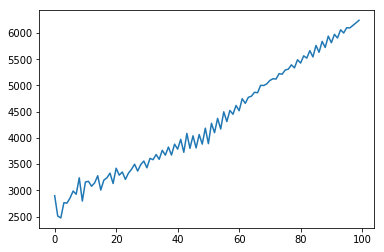

In [10]:
plt.plot(x[:100], y[:100])

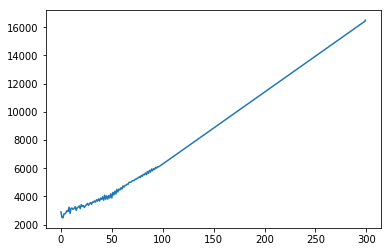

In [11]:
plt.plot(x, y)

OK, so it goes linear after around 100 iterations...

In [12]:
y[101] - y[100]

51

In [13]:
y[100] +  (y[101] - y[100]) * (50000000000 - 100)

2550000001195